# Data Exploring

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

titanic_data = pd.read_csv('/kaggle/input/titanic/train.csv')
titanic_test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


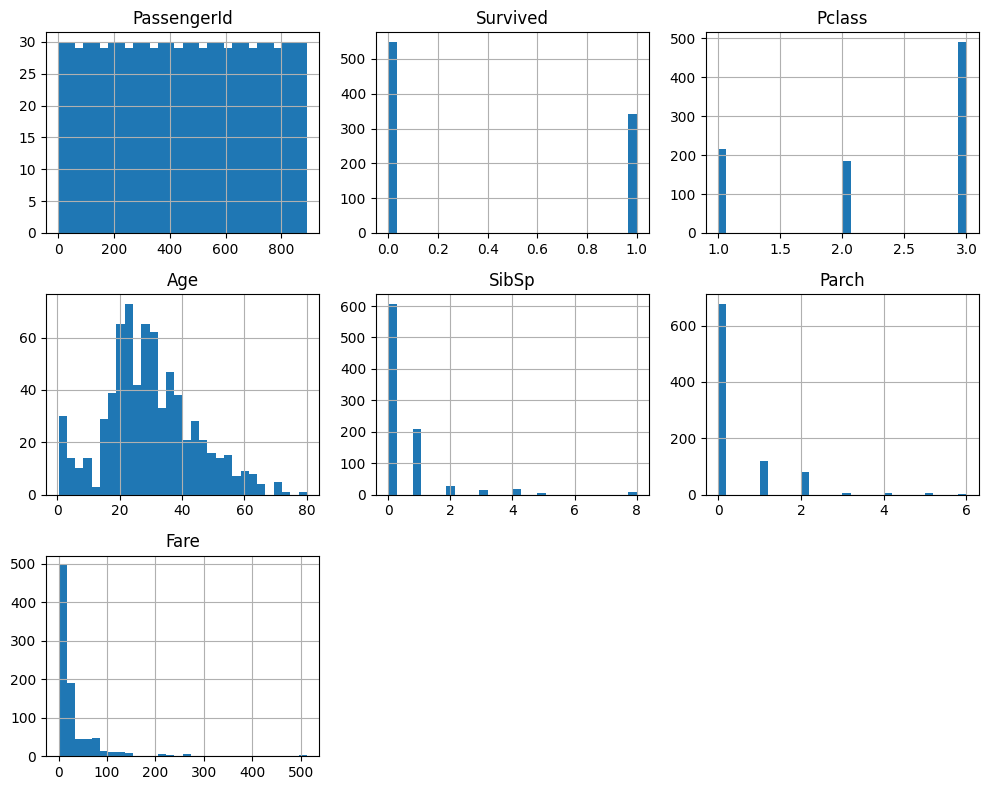

In [3]:
titanic_data.hist(figsize=(10, 8), bins=30)
plt.tight_layout()
plt.show()

# Data Cleaning and Processing

## Missing Data Handling

In [4]:
# Calculate and fill the median age where Age is not null and Parch > 0
median_age = titanic_data[(~titanic_data['Age'].isnull()) & (titanic_data['Parch'] > 0)]['Age'].median()
titanic_data.loc[(titanic_data['Age'].isnull()) & (titanic_data['Parch'] > 0), 'Age'] = median_age


# Calculate and fill the median age where Age is not null and Parch = 0
median_age = titanic_data[(~titanic_data['Age'].isnull()) & (titanic_data['Parch'] == 0)]['Age'].median()
titanic_data.loc[(titanic_data['Age'].isnull()) & (titanic_data['Parch'] > 0), 'Age'] = median_age

# Calculate the median age where Age is not null for the rest 
median_age = titanic_data[(~titanic_data['Age'].isnull())]['Age'].median()
titanic_data.loc[(titanic_data['Age'].isnull()), 'Age'] = median_age

titanic_data['Embarked'] = titanic_data['Embarked'].fillna('S')

# Apply Changes on Test Data
median_age = titanic_test_data[(~titanic_test_data['Age'].isnull()) & (titanic_test_data['Parch'] > 0)]['Age'].median()
titanic_test_data.loc[(titanic_test_data['Age'].isnull()) & (titanic_test_data['Parch'] > 0), 'Age'] = median_age


# Calculate and fill the median age where Age is not null and Parch = 0
median_age = titanic_test_data[(~titanic_test_data['Age'].isnull()) & (titanic_test_data['Parch'] == 0)]['Age'].median()
titanic_test_data.loc[(titanic_test_data['Age'].isnull()) & (titanic_test_data['Parch'] > 0), 'Age'] = median_age

# Calculate the median age where Age is not null for the rest 
median_age = titanic_test_data[(~titanic_test_data['Age'].isnull())]['Age'].median()
titanic_test_data.loc[(titanic_test_data['Age'].isnull()), 'Age'] = median_age

titanic_test_data['Embarked'] = titanic_test_data['Embarked'].fillna('S')

titanic_test_data['Fare'] = titanic_test_data['Fare'].fillna(titanic_test_data['Fare'].median())


## Data Transformation 

In [5]:
# Convert Sex col to binary
titanic_data['Sex_binary'] = titanic_data['Sex'].apply(lambda x: 1 if x == 'male' else 0)

# Apply Changes on Test Data
titanic_test_data['Sex_binary'] = titanic_test_data['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [6]:
# Convert 'Embarked' col using one-hot-encoded 
embarked_reshaped = titanic_data['Embarked'].values.reshape(-1, 1)

one_hot_encoder = OneHotEncoder(sparse_output=False)

data_cat_encoded = one_hot_encoder.fit_transform(embarked_reshaped)

encoded_df = pd.DataFrame(data_cat_encoded, columns=one_hot_encoder.get_feature_names_out(['Embarked']))

titanic_data = pd.concat([titanic_data, encoded_df], axis=1)

# Apply Changes on Test Data

embarked_reshaped = titanic_test_data['Embarked'].values.reshape(-1, 1)

one_hot_encoder = OneHotEncoder(sparse_output=False)

data_cat_encoded = one_hot_encoder.fit_transform(embarked_reshaped)

encoded_df = pd.DataFrame(data_cat_encoded, columns=one_hot_encoder.get_feature_names_out(['Embarked']))

titanic_test_data = pd.concat([titanic_test_data, encoded_df], axis=1)

In [7]:
# Log transform the 'Fare' col
titanic_data['Fare_log'] = np.log1p(titanic_data['Fare'])

# Scale the numerical columns (Age, Parch)
scaler = StandardScaler()
titanic_data[['Age_scaled', 'Parch_scaled']] = scaler.fit_transform(titanic_data[['Age', 'Parch']])

# Apply Changes on Test Data

titanic_test_data['Fare_log'] = np.log1p(titanic_test_data['Fare'])

# Scale the numerical columns (Age, Parch)
scaler = StandardScaler()
titanic_test_data[['Age_scaled', 'Parch_scaled']] = scaler.fit_transform(titanic_test_data[['Age', 'Parch']])

In [8]:
selected_columns = ['Pclass', 'Sex_binary', 'Age_scaled', 'SibSp', 'Parch_scaled', 'Fare_log', 'Embarked_C', 'Embarked_Q',  'Embarked_S', 'Survived']

titanic_data_filtered = titanic_data[selected_columns]

# Compute correlations using only numeric columns
correlation_matrix = titanic_data_filtered.corr(method='pearson')

correlation_matrix['Survived'].sort_values(ascending=False)

Survived        1.000000
Fare_log        0.329862
Embarked_C      0.168240
Parch_scaled    0.081629
Embarked_Q      0.003650
SibSp          -0.035322
Age_scaled     -0.061851
Embarked_S     -0.149683
Pclass         -0.338481
Sex_binary     -0.543351
Name: Survived, dtype: float64

# Comparison of Results Across Various Models

In [9]:
X = titanic_data_filtered.drop('Survived', axis=1)
y = titanic_data_filtered['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression( random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50, random_state=42),
    'SVC': SVC(C=1, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=3)
}

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_val)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    
    # Print the result
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    

Logistic Regression Accuracy: 0.80
Random Forest Accuracy: 0.84
Gradient Boosting Accuracy: 0.80
SVC Accuracy: 0.82
KNN Accuracy: 0.83


In [10]:
n_estimators = [10, 50, 100, 200]
for est in n_estimators: 
    # Initialize and train the Random Forest classifier
    rf = RandomForestClassifier(n_estimators=est, random_state=42)
    rf.fit(X_train, y_train)
    
    # Evaluate the model on the validation set
    y_val_pred = rf.predict(X_val)
    accuracy = rf.score(X_val, y_val)
    print(f"Validation Accuracy n_estimators({est}): {accuracy:.2f}")

Validation Accuracy n_estimators(10): 0.83
Validation Accuracy n_estimators(50): 0.84
Validation Accuracy n_estimators(100): 0.83
Validation Accuracy n_estimators(200): 0.82


## Select the Best Performance Model

In [11]:
# refit it again without splitting
X = titanic_data_filtered.drop('Survived', axis=1)
y = titanic_data_filtered['Survived']

rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X, y)

RandomForestClassifier(n_estimators=50, random_state=42)

## Test Data & Submit Results

In [12]:
selected_columns = ['Pclass', 'Sex_binary', 'Age_scaled', 'SibSp', 'Parch_scaled', 'Fare_log', 'Embarked_C', 'Embarked_Q',  'Embarked_S']

X_test = titanic_test_data[selected_columns]
predictions = rf.predict(X_test)

predictions_df = pd.DataFrame({
    'PassengerId': titanic_test_data['PassengerId'],
    'Survived': predictions  # 'predictions' is the array you generated
})

predictions_df.to_csv('submission.csv', index=False)